# WEEK 3 BOMB PLACEMENTS

## INSTRUCTIONS

Each block of code in this section must be run to obtain te final answer. The data cleaning section formats the data to work properly with the regression models, and the bomb plan section runs functions to analyze the week 3 data and return two bomb placements. The final bomb placements appear below the cell labeled "Final Answer." Be sure to adjust the directories for the week 3  data.

## DATA CLEANING

#### Run this block to format the data for the first two weeks; necessary for regressions

In [1]:
library(jsonlite)
#Loading Data
data.1 <- read_json("gps/20200818114606.geojson") #1 -- 8-18 // tuesday
data.2 <- read_json("gps/20200819132607.geojson") #2 -- 8-19 & 8-20 // wednesday & thursday
data.3 <- read_json("gps/20200820151044.geojson") #3 -- 8-20 & 8-21 // thursday & friday
data.4 <- read_json("gps/20200821111447.geojson") #4 -- 8-21 & 8-22 // friday & saturday
data.5 <- read_json("gps/20200824130857.geojson") #5 -- 8-24 // monday
data.6 <- read_json("gps/20200825121346.geojson") #6 -- 8-25 // tuesday
data.7 <- read_json("gps/20200826131614.geojson") #7 -- 8-26 & 8-27 // wednesday & thursday
data.8 <- read_json("gps/20200827113234.geojson") #8 -- 8-27 // thursday
data.9 <- read_json("gps/20200828122627.geojson") #9 -- 8-28 // friday
data.10 <- read_json("gps/20200828130816.geojson") #10 -- 8-28 // friday
data.11 <- read_json("gps/20200831115147.geojson") #11 -- 8-31 // monday

#Manipulating into data frames
data.clean <- function(data){
    temp.df <- data.frame(latitude = rep(NA, length(data[["features"]])), longitude = rep(NA, length(data[["features"]])), time = rep(NA, length(data[["features"]])))

    for (i in 1:length(data[["features"]])){
        temp.df[i,"latitude"] <- data[["features"]][[i]][["geometry"]][["coordinates"]][[2]]
        temp.df[i,"longitude"] <- data[["features"]][[i]][["geometry"]][["coordinates"]][[1]]
        temp.df[i,"time"] <- data[["features"]][[i]][["properties"]][["time"]]

    }
    tform <- strptime(temp.df$time, "%Y-%m-%dT%H:%M:%S")
    
    full <- as.POSIXct(tform, format = "%Y-%m-%d%H:%M:%S", tz = "us/mountain") - 2*60*60
    temp.df <- cbind(temp.df, data.frame(time.full = full))
    
    reduced <- as.numeric(format(tform, "%H")) + (as.numeric(format(tform, "%M"))/60) + (as.numeric(format(tform, "%S"))/(60*60)) - 2
    temp.df <- cbind(temp.df, data.frame(time.reduced = reduced))
    
    hour <- as.integer(as.numeric(format(tform, "%H"))) - 2
    temp.df <- cbind(temp.df, data.frame(hour = hour))
    
    dupes <- duplicated(temp.df$latitude) & duplicated(temp.df$longitude)
    temp.df.clean <- temp.df[!dupes,]
    return(temp.df.clean)
    
}

df.1 <- data.clean(data.1)
df.2 <- data.clean(data.2)
df.3 <- data.clean(data.3)
df.4 <- data.clean(data.4)
df.5 <- data.clean(data.5)
df.6 <- data.clean(data.6)
df.7 <- data.clean(data.7)
df.8 <- data.clean(data.8)
df.9 <- data.clean(data.9)
df.10 <- data.clean(data.10)
df.11 <- data.clean(data.11)

#Pull Weather Data
weather <- read.csv("weather data.csv", header = T)[1:15,]
weather$date.form <- strptime(weather$DATE, "%m/%d/%Y")
get.weather <- function(df){
    wvec <- rep(NA, nrow(df))
    
    for(i in 1:nrow(df)){
        wrow <- which(strptime(df$time.full[1], format = "%Y-%m-%d") == weather$date.form)
         wvec[i] <- weather[wrow, "TAVG"]
         
    }
    df.new <- cbind(df, data.frame(temp = wvec))
    return(df.new)
}

df.1.weather <- get.weather(df.1)
df.2.weather <- get.weather(df.2)
df.3.weather <- get.weather(df.3)
df.4.weather <- get.weather(df.4)
df.5.weather <- get.weather(df.5)
df.6.weather <- get.weather(df.6)
df.7.weather <- get.weather(df.7)
df.8.weather <- get.weather(df.8)
df.9.weather <- get.weather(df.9)
df.10.weather <- get.weather(df.10)
df.11.weather <- get.weather(df.11)

sortdf <- function(df){
    return(df[order(df$time.full),])
}

#Sort by time
df.1.sort <- sortdf(df.1.weather)
df.2.sort <- sortdf(df.2.weather)
df.3.sort <- sortdf(df.3.weather)
df.4.sort <- sortdf(df.4.weather)
df.5.sort <- sortdf(df.5.weather)
df.6.sort <- sortdf(df.6.weather)
df.7.sort <- sortdf(df.7.weather)
df.8.sort <- sortdf(df.8.weather)
df.9.sort <- sortdf(df.9.weather)
df.10.sort <- sortdf(df.10.weather)
df.11.sort <- sortdf(df.11.weather)

epochtime <- function(df){
    etime <- as.integer(as.POSIXct(df[,"time.full"]))
    etime.df <- data.frame(time.epoch = etime)
    return(cbind(df, etime.df))
}

#Extract epoch time

df.1.etime <- epochtime(df.1.sort)
df.2.etime <- epochtime(df.2.sort)
df.3.etime <- epochtime(df.3.sort)
df.4.etime <- epochtime(df.4.sort)
df.5.etime <- epochtime(df.5.sort)
df.6.etime <- epochtime(df.6.sort)
df.7.etime <- epochtime(df.7.sort)
df.8.etime <- epochtime(df.8.sort)
df.9.etime <- epochtime(df.9.sort)
df.10.etime <- epochtime(df.10.sort)
df.11.etime <- epochtime(df.11.sort)

getduration <- function(df){
    
#     duration <- (df[,"time.reduced"] - df[1,"time.reduced"])*(30*120)
    duration <- df[,"time.epoch"] - df[1,"time.epoch"]
    duration.df <- data.frame(duration = duration)
    return(cbind(df, duration.df))
    
}

#Get duration of walk

df.1.duration <- getduration(df.1.etime)
df.2.duration <- getduration(df.2.etime)
df.3.duration <- getduration(df.3.etime)
df.4.duration <- getduration(df.4.etime)
df.5.duration <- getduration(df.5.etime)
df.6.duration <- getduration(df.6.etime)
df.7.duration <- getduration(df.7.etime)
df.8.duration <- getduration(df.8.etime)
df.9.duration <- getduration(df.9.etime)
df.10.duration <- getduration(df.10.etime)
df.11.duration <- getduration(df.11.etime)

time.dif <- function(time){
#     time.format <- strptime(time, "%Y-%m-%dT%H:%M:%S")
#     time.sort <- sort(as.POSIXct(time.format, format = "%Y-%m-%d%H:%M:%S"))
    time.sort <- sort(time)
    
    i <- 1:(length(time.sort) - 1)
    tdvec <- time.sort[i+1] - time.sort[i]
    
    return(as.numeric(tdvec))
}

#Create vector of time between data collection

timedif.1 <- time.dif(df.1.duration$time.full)
timedif.2 <- time.dif(df.2.duration$time.full)
timedif.3 <- time.dif(df.3.duration$time.full)
timedif.4 <- time.dif(df.4.duration$time.full)
timedif.5 <- time.dif(df.5.duration$time.full)
timedif.6 <- time.dif(df.6.duration$time.full)
timedif.7 <- time.dif(df.7.duration$time.full)
timedif.8 <- time.dif(df.8.duration$time.full)
timedif.9 <- time.dif(df.9.duration$time.full)
timedif.10 <- time.dif(df.10.duration$time.full)
timedif.11 <- time.dif(df.11.duration$time.full)

library(sp)
library(rgdal)

coords <- function(df){
    spat_df <- SpatialPointsDataFrame(coords=df[, c("longitude", "latitude")],
                                      data= as.data.frame(df[, "time"]),
                                      proj4string=CRS("+proj=longlat +datum=WGS84"))
    utm_df <- spTransform(spat_df, CRSobj = "+proj=utm +zone=12 +datum=WGS84")
    utm_coords <- coordinates(utm_df)
    
    return(utm_coords)
}

#Create coordinate data frames

coords.1 <- coords(df.1.duration)
coords.2 <- coords(df.2.duration)
coords.3 <- coords(df.3.duration)
coords.4 <- coords(df.4.duration)
coords.5 <- coords(df.5.duration)
coords.6 <- coords(df.6.duration)
coords.7 <- coords(df.7.duration)
coords.8 <- coords(df.8.duration)
coords.9 <- coords(df.9.duration)
coords.10 <- coords(df.10.duration)
coords.11 <- coords(df.11.duration)

# Append starting longitude and lattitude

df.1.duration$start.long <- coords.1[1,"longitude"]
df.1.duration$start.lat <- coords.1[1,"latitude"]

df.2.duration$start.long <- coords.2[1,"longitude"]
df.2.duration$start.lat <- coords.2[1,"latitude"]

df.3.duration$start.long <- coords.3[1,"longitude"]
df.3.duration$start.lat <- coords.3[1,"latitude"]

df.4.duration$start.long <- coords.4[1,"longitude"]
df.4.duration$start.lat <- coords.4[1,"latitude"]

df.5.duration$start.long <- coords.5[1,"longitude"]
df.5.duration$start.lat <- coords.5[1,"latitude"]

df.6.duration$start.long <- coords.6[1,"longitude"]
df.6.duration$start.lat <- coords.6[1,"latitude"]

df.7.duration$start.long <- coords.7[1,"longitude"]
df.7.duration$start.lat <- coords.7[1,"latitude"]

df.8.duration$start.long <- coords.8[1,"longitude"]
df.8.duration$start.lat <- coords.8[1,"latitude"]

df.9.duration$start.long <- coords.9[1,"longitude"]
df.9.duration$start.lat <- coords.9[1,"latitude"]

df.10.duration$start.long <- coords.10[1,"longitude"]
df.10.duration$start.lat <- coords.10[1,"latitude"]

df.11.duration$start.long <- coords.11[1,"longitude"]
df.11.duration$start.lat <- coords.11[1,"latitude"]

library(dlm)


dlmfs <- function(coords, times){
    gps_variance <- 20^2 #Using wide variance
    
    v_mat <- matrix(c(gps_variance, 0, 0, gps_variance), ncol=2)
    dt <- mean(times[times < 60])
    
    g_mat <- matrix(c(1, 0, dt, 0,
                      0, 1, 0, dt,
                      0, 0, 1, 0,
                      0, 0, 0, 1), byrow=TRUE, ncol=4)
    
    f_mat <- matrix(c(1, 0, dt, 0,
                      0, 1, 0, dt), byrow=TRUE, ncol=4)
    
    avg_walk_speed_m_per_sec <- 1.4  # https://en.wikipedia.org/wiki/Walking
    
    dlm_spec <- dlm(
        FF= f_mat,
        GG= g_mat,
        V = v_mat,
        W = diag(c(5, 5, 1, 1)^2), #Wide intervals again
        m0 = matrix(c(coords[1, ], rep(avg_walk_speed_m_per_sec / dt, 2)),
                    ncol=1), 
        C0 = diag(rep(10^2, 4)))
    
    dlm_filter_mod <- dlmFilter(coords, dlm_spec)
    dlm_smooth_mod <- dlmSmooth(dlm_filter_mod)
    
    return(list("filter" = dlm_filter_mod, "smoother" = dlm_smooth_mod))

}

#Create DLM

dlm.1 <- dlmfs(coords.1, timedif.1)
dlm.2 <- dlmfs(coords.2, timedif.2)
dlm.3 <- dlmfs(coords.3, timedif.3)
dlm.4 <- dlmfs(coords.4, timedif.4)
dlm.5 <- dlmfs(coords.5, timedif.5)
dlm.6 <- dlmfs(coords.6, timedif.6)
dlm.7 <- dlmfs(coords.7, timedif.7)
dlm.8 <- dlmfs(coords.8, timedif.8)
dlm.9 <- dlmfs(coords.9, timedif.9)
dlm.10 <- dlmfs(coords.10, timedif.10)
dlm.11 <- dlmfs(coords.11, timedif.11)

library(fields)

#Extract longitude and latitude velocities from smoother; convert them into speeds; take the average speed for each walk;
#remove outliers; calculate the distance between each point and the starting point
df.1.duration$long.vel <- dlm.1$smoother$s[-1, 3]
df.1.duration$lat.vel <- dlm.1$smoother$s[-1, 4]
df.1.duration$speed <- sqrt(df.1.duration$long.vel^2 + df.1.duration$lat.vel^2)
df.1.duration$speed.avg <- mean(df.1.duration$speed[1:78])
df.1.duration$distance <- as.vector(rdist.earth(df.1.duration[1, c("longitude", "latitude")],
                                                df.1.duration[, c("longitude", "latitude")]))

df.2.duration$long.vel <- dlm.2$smoother$s[-1, 3]
df.2.duration$lat.vel <- dlm.2$smoother$s[-1, 4]
df.2.duration$speed <- sqrt(df.2.duration$long.vel^2 + df.2.duration$lat.vel^2)
df.2.duration$speed.avg <- mean(df.2.duration$speed)
df.2.duration$distance <- as.vector(rdist.earth(df.2[1, c("longitude", "latitude")],
                                                df.2[, c("longitude", "latitude")]))


df.3.duration$long.vel <- dlm.3$smoother$s[-1, 3]
df.3.duration$lat.vel <- dlm.3$smoother$s[-1, 4]
df.3.duration$speed <- sqrt(df.3.duration$long.vel^2 + df.3.duration$lat.vel^2)
df.3.duration$speed.avg <- mean(df.3.duration$speed)
df.3.duration$distance <- as.vector(rdist.earth(df.3[1, c("longitude", "latitude")],
                                                df.3[, c("longitude", "latitude")]))


df.4.duration$long.vel <- dlm.4$smoother$s[-1, 3]
df.4.duration$lat.vel <- dlm.4$smoother$s[-1, 4]
df.4.duration$speed <- sqrt(df.4.duration$long.vel^2 + df.4.duration$lat.vel^2)
df.4.duration$speed.avg <- mean(df.4.duration$speed)
df.4.duration$distance <- as.vector(rdist.earth(df.4.duration[1, c("longitude", "latitude")],
                                                df.4.duration[, c("longitude", "latitude")]))


df.5.duration$long.vel <- dlm.5$smoother$s[-1, 3]
df.5.duration$lat.vel <- dlm.5$smoother$s[-1, 4]
df.5.duration$speed <- sqrt(df.5.duration$long.vel^2 + df.5.duration$lat.vel^2)
df.5.duration$speed.avg <- mean(df.5.duration$speed)
df.5.duration$distance <- as.vector(rdist.earth(df.5.duration[1, c("longitude", "latitude")],
                                                df.5.duration[, c("longitude", "latitude")]))


df.6.duration$long.vel <- dlm.6$smoother$s[-1, 3]
df.6.duration$lat.vel <- dlm.6$smoother$s[-1, 4]
df.6.duration$speed <- sqrt(df.6.duration$long.vel^2 + df.6.duration$lat.vel^2)
df.6.duration$speed.avg <- mean(df.6.duration$speed)
df.6.duration$distance <- as.vector(rdist.earth(df.6.duration[1, c("longitude", "latitude")],
                                                df.6.duration[, c("longitude", "latitude")]))


df.7.duration$long.vel <- dlm.7$smoother$s[-1, 3]
df.7.duration$lat.vel <- dlm.7$smoother$s[-1, 4]
df.7.duration$speed <- sqrt(df.7.duration$long.vel^2 + df.7.duration$lat.vel^2)
df.7.duration$speed.avg <- mean(df.7.duration$speed[1:703])
df.7.duration$distance <- as.vector(rdist.earth(df.7.duration[1, c("longitude", "latitude")],
                                                df.7.duration[, c("longitude", "latitude")]))


df.8.duration$long.vel <- dlm.8$smoother$s[-1, 3]
df.8.duration$lat.vel <- dlm.8$smoother$s[-1, 4]
df.8.duration$speed <- sqrt(df.8.duration$long.vel^2 + df.8.duration$lat.vel^2)
df.8.duration$speed.avg <- mean(df.8.duration$speed)
df.8.duration$distance <- as.vector(rdist.earth(df.8.duration[1, c("longitude", "latitude")],
                                                df.8.duration[, c("longitude", "latitude")]))


df.9.duration$long.vel <- dlm.9$smoother$s[-1, 3]
df.9.duration$lat.vel <- dlm.9$smoother$s[-1, 4]
df.9.duration$speed <- sqrt(df.9.duration$long.vel^2 + df.9.duration$lat.vel^2)
df.9.duration$speed.avg <- mean(df.9.duration$speed)
df.9.duration$distance <- as.vector(rdist.earth(df.9.duration[1, c("longitude", "latitude")],
                                                df.9.duration[, c("longitude", "latitude")]))


df.10.duration$long.vel <- dlm.10$smoother$s[-1, 3]
df.10.duration$lat.vel <- dlm.10$smoother$s[-1, 4]
df.10.duration$speed <- sqrt(df.10.duration$long.vel^2 + df.10.duration$lat.vel^2)
df.10.duration$speed.avg <- mean(df.10.duration$speed)
df.10.duration$distance <- as.vector(rdist.earth(df.10.duration[1, c("longitude", "latitude")],
                                                df.10.duration[, c("longitude", "latitude")]))


df.11.duration$long.vel <- dlm.11$smoother$s[-1, 3]
df.11.duration$lat.vel <- dlm.11$smoother$s[-1, 4]
df.11.duration$speed <- sqrt(df.11.duration$long.vel^2 + df.11.duration$lat.vel^2)
df.11.duration$speed.avg <- mean(df.11.duration$speed[c(1:349, 461:765)])
df.11.duration$distance <- as.vector(rdist.earth(df.11.duration[1, c("longitude", "latitude")],
                                                df.11.duration[, c("longitude", "latitude")]))

split.df <- function(df, coords){
    df.out <- df[df$duration < 4000, ]
    coords.out <- coords[df$duration < 4000, ]
    
    df.in <- df[df$duration > 11000, ]
    df.in$duration <- df.in$duration - df.in$duration[1]
    coords.in <- coords[df$duration > 11000, ]
    
    ldf <- list(df.out = df.out, coords.out = coords.out, df.in = df.in, coords.in = coords.in)
    
}

#Split each data frame into outbound and inbound trips
df.1.out <- split.df(df.1.duration, coords.1)$df.out
coords.1.out <- split.df(df.1.duration, coords.1)$coords.out
df.1.in <- split.df(df.1.duration, coords.1)$df.in
coords.1.in <- split.df(df.1.duration, coords.1)$coords.in

df.2.out <- split.df(df.2.duration, coords.2)$df.out
coords.2.out <- split.df(df.2.duration, coords.2)$coords.out
df.2.in <- split.df(df.2.duration, coords.2)$df.in
coords.2.in <- split.df(df.2.duration, coords.2)$coords.in

df.3.out <- split.df(df.3.duration, coords.3)$df.out
coords.3.out <- split.df(df.3.duration, coords.3)$coords.out
df.3.in <- split.df(df.3.duration, coords.3)$df.in
coords.3.in <- split.df(df.3.duration, coords.3)$coords.in

df.4.out <- split.df(df.4.duration, coords.4)$df.out
coords.4.out <- split.df(df.4.duration, coords.4)$coords.out
df.4.in <- split.df(df.4.duration, coords.4)$df.in
coords.4.in <- split.df(df.4.duration, coords.4)$coords.in

df.5.out <- split.df(df.5.duration, coords.5)$df.out
coords.5.out <- split.df(df.5.duration, coords.5)$coords.out
df.5.in <- split.df(df.5.duration, coords.5)$df.in
coords.5.in <- split.df(df.5.duration, coords.5)$coords.in

df.6.out <- split.df(df.6.duration, coords.6)$df.out
coords.6.out <- split.df(df.6.duration, coords.6)$coords.out
df.6.in <- split.df(df.6.duration, coords.6)$df.in
coords.6.in <- split.df(df.6.duration, coords.6)$coords.in

df.7.out <- split.df(df.7.duration, coords.7)$df.out
coords.7.out <- split.df(df.7.duration, coords.7)$coords.out
df.7.in <- split.df(df.7.duration, coords.7)$df.in
coords.7.in <- split.df(df.7.duration, coords.7)$coords.in
coords.7.in <- coords.7.in[df.7.in$duration < 15000,]
df.7.in <- df.7.in[df.7.in$duration < 15000,]

df.8.out <- split.df(df.8.duration, coords.8)$df.out
coords.8.out <- split.df(df.8.duration, coords.8)$coords.out
df.8.in <- split.df(df.8.duration, coords.8)$df.in
coords.8.in <- split.df(df.8.duration, coords.8)$coords.in

df.9.out <- split.df(df.9.duration, coords.9)$df.out
coords.9.out <- split.df(df.9.duration, coords.9)$coords.out
df.9.in <- split.df(df.9.duration, coords.9)$df.in
coords.9.in <- split.df(df.9.duration, coords.9)$coords.in

df.10.out <- split.df(df.10.duration, coords.10)$df.out
coords.10.out <- split.df(df.10.duration, coords.10)$coords.out
df.10.in <- split.df(df.10.duration, coords.10)$df.in
coords.10.in <- split.df(df.10.duration, coords.10)$coords.in

df.11.out <- split.df(df.11.duration, coords.11)$df.out
coords.11.out <- split.df(df.11.duration, coords.11)$coords.out
df.11.in <- split.df(df.11.duration, coords.11)$df.in
coords.11.in <- split.df(df.11.duration, coords.11)$coords.in

df.full.out <- rbind(df.1.out,
                    df.2.out,
                    df.3.out,
                    df.4.out,
                    df.5.out,
                    df.6.out,
                    df.7.out,
                    df.8.out,
                    df.9.out,
                    df.11.out) #dropped 10 because it's only inbound data
rownames(df.full.out) <- 1:nrow(df.full.out)


coords.full.out <- rbind(coords.1.out,
                        coords.2.out,
                        coords.3.out,
                        coords.4.out,
                        coords.5.out,
                        coords.6.out,
                        coords.7.out,
                        coords.8.out,
                        coords.9.out,
                        coords.11.out)
rownames(coords.full.out) <- 1:nrow(coords.full.out)


df.full.in <- rbind(df.2.in,
                   df.3.in,
                   df.4.in,
                   df.5.in,
                   df.6.in,
                   df.7.in,
                   df.8.in,
                   df.10.in,
                   df.11.in) # dropped 1 and 9 for not containing sufficient inbound data
rownames(df.full.in) <- 1:nrow(df.full.in)


coords.full.in <- rbind(coords.2.in,
                       coords.3.in,
                       coords.4.in,
                       coords.5.in,
                       coords.6.in,
                       coords.7.in,
                       coords.8.in,
                       coords.10.in,
                       coords.11.in) 
rownames(coords.full.in) <- 1:nrow(coords.full.in)

#Create a data frame of just the first point ftom each outbound trip
df.first.out <- rbind(df.1.out[1,],
                      df.2.out[1,],
                      df.3.out[1,],
                      df.4.out[1,],
                      df.5.out[1,],
                      df.6.out[1,],
                      df.7.out[1,],
                      df.8.out[1,],
                      df.9.out[1,],
                      df.11.out[1,])


remove5 <- function(df){
    i <- 2
    while ((df[i, "time.reduced"] - df[1, "time.reduced"]) < 0.0833333333333333){
        i <- i + 1
    }
    
    return(i)
}

#Remove the first 5 minutes of the outbound trips

r1 <- remove5(df.1.out)
df.c.1.out <- df.1.out[r1:nrow(df.1.out), ]
coords.c.1.out <- coords.1.out[r1:nrow(df.1.out), ]

r2 <- remove5(df.2.out)
df.c.2.out <- df.2.out[r2:nrow(df.2.out), ]
coords.c.2.out <- coords.2.out[r2:nrow(df.2.out), ]

r3 <- remove5(df.3.out)
df.c.3.out <- df.3.out[r3:nrow(df.3.out), ]
coords.c.3.out <- coords.3.out[r3:nrow(df.3.out), ]

r4 <- remove5(df.4.out)
df.c.4.out <- df.4.out[r4:nrow(df.4.out), ]
coords.c.4.out <- coords.4.out[r4:nrow(df.4.out), ]

r5 <- remove5(df.5.out)
df.c.5.out <- df.5.out[r5:nrow(df.5.out), ]
coords.c.5.out <- coords.5.out[r5:nrow(df.5.out), ]

r6 <- remove5(df.6.out)
df.c.6.out <- df.6.out[r6:nrow(df.6.out), ]
coords.c.6.out <- coords.6.out[r6:nrow(df.6.out), ]

r7 <- remove5(df.7.out)
df.c.7.out <- df.7.out[r7:nrow(df.7.out), ]
coords.c.7.out <- coords.7.out[r7:nrow(df.7.out), ]

r8 <- remove5(df.8.out)
df.c.8.out <- df.8.out[r8:nrow(df.8.out), ]
coords.c.8.out <- coords.8.out[r8:nrow(df.8.out), ]

r9 <- remove5(df.9.out)
df.c.9.out <- df.9.out[r9:nrow(df.9.out), ]
coords.c.9.out <- coords.9.out[r9:nrow(df.9.out), ]

r10 <- remove5(df.10.out)
df.c.10.out <- df.10.out[r10:nrow(df.10.out), ]
coords.c.10.out <- coords.10.out[r10:nrow(df.10.out), ]

r11 <- remove5(df.11.out)
df.c.11.out <- df.11.out[r11:nrow(df.11.out), ]
coords.c.11.out <- coords.11.out[r11:nrow(df.11.out), ]

#Create data frame with outbound trips with first 5 minutes removed
df.c.full.out <- rbind(df.c.1.out,
                       df.c.2.out,
                       df.c.3.out,
                       df.c.4.out,
                       df.c.5.out,
                       df.c.6.out,
                       df.c.7.out,
                       df.c.8.out,
                       df.c.9.out,
                       df.c.11.out)
rownames(df.c.full.out) <- 1:nrow(df.c.full.out)


coords.c.full.out <- rbind(coords.c.1.out,
                           coords.c.2.out,
                           coords.c.3.out,
                           coords.c.4.out,
                           coords.c.5.out,
                           coords.c.6.out,
                           coords.c.7.out,
                           coords.c.8.out,
                           coords.c.9.out,
                           coords.c.11.out)
rownames(coords.c.full.out) <- 1:nrow(coords.c.full.out)
library(geojsonio)

rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/nicho/anaconda3/envs/hw3/Lib/R/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/nicho/anaconda3/envs/hw3/Lib/R/library/rgdal/proj
 Linking to sp version: 1.3-1 
Warning message:
"package 'fields' was built under R version 3.6.3"Loading required package: spam
Warning message:
"package 'spam' was built under R version 3.6.3"Loading required package: dotCall64
Warning message:
"package 'dotCall64' was built under R version 3.6.3"Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the 

## BOMB PLAN

All blocks in this section must be run. The bombs() takes as input the starting latitude, longitude, and timpstamp from all 6 days from week 3 and returns two bomb locations for each day (12 bombs total). The place.bombs() function takes as input the output of bombs() and returns the two best bombs from the week, thus providing my final two bomb placements. If you want to view the bomb locations of an individual day, input the starting latitude, longitude, and timestamp of just one day into the bombs() function. 


#### Load in Week 3 Data

Adjust the directories as necessary to load week 3 data

In [204]:
#Load in week three data starting points
d.new.1 <- read_json("new_data/20200901112100.geojson")
d.new.2 <- read_json("new_data/20200902125611.geojson")
d.new.3 <- read_json("new_data/20200903110618.geojson")
d.new.4 <- read_json("new_data/20200908081420.geojson")
d.new.5 <- read_json("new_data/20200910070926.geojson")
d.new.6 <- read_json("new_data/20200914101156.geojson")

df.new <- data.frame(longitude = rep(NA, 6), latitude= rep(NA, 6), time= rep(NA, 6))

#Convert from list to data frame
df.new$longitude <- c(d.new.1[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.2[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.3[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.4[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.5[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.6[["features"]][[1]][["geometry"]][["coordinates"]][[1]])

df.new$latitude <- c(d.new.1[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.2[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.3[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.4[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.5[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.6[["features"]][[1]][["geometry"]][["coordinates"]][[2]])

df.new$time <- c(d.new.1[["features"]][[1]][["properties"]][["time"]],
                 d.new.2[["features"]][[1]][["properties"]][["time"]],
                 d.new.3[["features"]][[1]][["properties"]][["time"]],
                 d.new.4[["features"]][[1]][["properties"]][["time"]],
                 d.new.5[["features"]][[1]][["properties"]][["time"]],
                 d.new.6[["features"]][[1]][["properties"]][["time"]])
                     

### BOMB A REGRESSION

#### Create the longitude and latitude regressions for Bomb A

In [205]:
#Load in data, remove outlier data

df.a <- rbind(df.c.1.out,
              df.c.2.out[df.c.2.out$duration < 479,], 
              df.c.3.out[df.c.3.out$duration < 486,], 
              df.c.4.out[df.c.4.out$duration < 507,], 
              df.c.7.out, 
              df.c.9.out[df.c.9.out$duration < 422,], 
              df.c.11.out[df.c.11.out$duration < 449,]) 

coords.a <- rbind(coords.c.1.out,
                  coords.c.2.out[df.c.2.out$duration < 479,],
                  coords.c.3.out[df.c.3.out$duration < 486,],
                  coords.c.4.out[df.c.4.out$duration < 507,],
                  coords.c.7.out,
                  coords.c.9.out[df.c.9.out$duration < 422,],
                  coords.c.11.out[df.c.11.out$duration < 449,])

latmin <- 5196465
latmax <- 5196600
longmin <- 271650
longmax <- 271950

#Create a subset of the data that only includes data within specific longitude and latitude ranges

df.m.a <- df.a[coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax & 
                           coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax, ]

coords.m.a <- data.frame(longitude = coords.a[,"longitude"][coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax &
                                                                      coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax],
                         latitude = coords.a[,"latitude"][coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax &
                                                                      coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax])

#Generate longitude and latitude regressions

mod.long.a <-lm(coords.m.a[,"longitude"] ~ duration + start.long + start.lat, data = df.m.a)


mod.lat.a <-lm(coords.m.a[,"latitude"] ~ duration + start.lat + start.long, data = df.m.a)

#Create a data frame of residuals; take the sum of squared residuals for each longitude-latitude pair; take the average
#duration of the top 20% of pairs with the smallest sum of squared residuals

resid.df.a <- data.frame(long.resid = mod.long.a$residuals, lat.resid = mod.lat.a$residuals)
resid.df.a$sos <- (resid.df.a$long.resid^2) + (resid.df.a$lat.resid^2)
resid.df.a$duration <- df.m.a$duration

d.a <- mean(resid.df.a[order(resid.df.a$sos), "duration"][1:as.integer(.2*nrow(resid.df.a))])



### BOMB B REGRESSION

#### Create the longitude and latitude regressions for Bomb B

In [206]:
#Load in data, remove outlier data

df.b <- rbind(df.c.5.out,
              df.c.6.out,
              df.c.8.out,
              df.c.3.out,
              df.c.4.out,
              df.c.2.out) 

coords.b <- rbind(coords.c.5.out,
                  coords.c.6.out,
                  coords.c.8.out,
                  coords.c.3.out,
                  coords.c.4.out,
                  coords.c.2.out)

latmin <- 5196450
latmax <- 5196680
longmin <- 271595
longmax <- 271650

#Create a subset of the data that only includes data within specific longitude and latitude ranges

df.m.b <- df.b[coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax & 
                           coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax, ]

coords.m.b <- data.frame(longitude = coords.b[,"longitude"][coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax &
                                                                      coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax],
                         latitude = coords.b[,"latitude"][coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax &
                                                                      coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax])

#Generate longitude and latitude regressions

mod.long.b <-lm(coords.m.b[,"longitude"] ~ duration + start.long + start.lat, data = df.m.b)


mod.lat.b <-lm(coords.m.b[,"latitude"] ~ duration + start.lat + start.long, data = df.m.b)

#Create a data frame of residuals; take the sum of squared residuals for each longitude-latitude pair; take the average
#duration of the top 20% of pairs with the smallest sum of squared residuals

resid.df.b <- data.frame(long.resid = mod.long.b$residuals, lat.resid = mod.lat.b$residuals)
resid.df.b$sos <- (resid.df.b$long.resid^2) + (resid.df.b$lat.resid^2)
resid.df.b$duration <- df.m.b$duration

d.b <- mean(resid.df.b[order(resid.df.b$sos), "duration"][1:as.integer(.3*nrow(resid.df.b))])

### BOMB GENERATION

In [207]:
#Determine two possible locations for each day. Can take more than one input, will return list of relevant metrics

bombs <- function(initial.long, initial.lat, initial.timestamp){
    
    #Format starting coordinates into UTM format
    
    longlat.df <- data.frame(longitude = initial.long, latitude = initial.lat, time = initial.timestamp)
    coords.df <- coords(longlat.df)
    start.long <- coords.df[,"longitude"]
    start.lat <- coords.df[,"latitude"]
    
    #Format time into datetime POSIXct object with the true time / time zone
    
    timetemp <- strptime(initial.timestamp, "%Y-%m-%dT%H:%M:%S")
    time.format <- as.POSIXct(timetemp, format = "%Y-%m-%d%H:%M:%S", tz = "us/mountain") - 2*60*60
    
       
    #Create longitude and latitude data for bomb A
    
    lat.data.a <- data.frame(duration = d.a, start.lat = start.lat, start.long = start.long)
    long.data.a <- data.frame(duration = d.a, start.lat = start.lat, start.long = start.long)
    
    #Predict longitude and latitude for bomb A
    
    lat.utm.a <- predict(mod.lat.a, newdata = lat.data.a)
    long.utm.a <- predict(mod.long.a, newdata = long.data.a)
    
    #Convert longitude and latitude back from UTM for bomb A
    
    sputm.a <- SpatialPoints(data.frame(longitude = long.utm.a, latitude = lat.utm.a),
                             proj4string=CRS("+proj=utm +zone=12 +datum=WGS84"))
    spgeo.a <- spTransform(sputm.a, CRS("+proj=longlat +datum=WGS84"))
    
    #Store latitude, longitude, time of detonation, and day of week for bomb A
    
    bomb.lat.a <- as.numeric(spgeo.a$latitude)
    bomb.long.a <- as.numeric(spgeo.a$longitude)
    bomb.time.a <- time.format + d.a
    bomb.weekday.a <-weekdays(bomb.time.a)

    #Repeat all above steps for bomb B
    
    lat.data.b <- data.frame(duration = d.b, start.lat = start.lat, start.long = start.long)
    long.data.b <- data.frame(duration = d.b, start.lat = start.lat, start.long = start.long)
    
    
    lat.utm.b <- predict(mod.lat.b, newdata = lat.data.b)
    long.utm.b <- predict(mod.long.b, newdata = long.data.b)
    
    
    sputm.b <- SpatialPoints(data.frame(longitude = long.utm.b, latitude = lat.utm.b),
                             proj4string=CRS("+proj=utm +zone=12 +datum=WGS84"))
    spgeo.b <- spTransform(sputm.b, CRS("+proj=longlat +datum=WGS84"))
    
    
    bomb.lat.b <- as.numeric(spgeo.b$latitude)
    bomb.long.b <- as.numeric(spgeo.b$longitude)
    bomb.time.b <- time.format + d.b
    bomb.weekday.b <-weekdays(bomb.time.b)
    
    
    #Create output, storing longitude, latitude, detonation time, weekday, and duration of walk in list
    
    bombplan <- list("Bomb.A", "Bomb.B")
    
    bombplan$Bomb.A$longitude <- bomb.long.a
    bombplan$Bomb.A$latitude <- bomb.lat.a
    bombplan$Bomb.A$time <- bomb.time.a
    bombplan$Bomb.A$weekday <- bomb.weekday.a
    bombplan$Bomb.A$duration <- d.a
    
    
    bombplan$Bomb.B$longitude <- bomb.long.b
    bombplan$Bomb.B$latitude <- bomb.lat.b
    bombplan$Bomb.B$time <- bomb.time.b
    bombplan$Bomb.B$weekday <- bomb.weekday.b
    bombplan$Bomb.B$duration <- d.b
    
    return(bombplan)

}

In [208]:
place.bombs <- function(bomblist){
    
    df.hits.a <- data.frame(longitude = NULL, latitude = NULL, time = NULL, weekday = NULL, hits = NULL, accuracy = NULL, bomb.id = NULL)
    n <- length(bomblist$Bomb.A$longitude)
    d.radius <- 0.008

    #For each possible bomb on path A, determine how many points from the training fata are within the blast radius;
    #determine the distance the user was from the bomb; determine how close they were temporally to the bomb's detonaation;
    #combine the ratios of these values to form an "accuracy ratio;" sum the accuracies of all the points that would have
    #been hit by the bomb
    
    for(i in 1:n){
        
        #Initialize bomb data
        
        df.bomb.a <- data.frame(longitude = bomblist$Bomb.A$longitude[i],
                                latitude = bomblist$Bomb.A$latitude[i],
                                time = bomblist$Bomb.A$time[i],
                                weekday = bomblist$Bomb.A$weekday[i])
        
        #Calculate the distance between the bomb and every point
        
        dist.vec.a <- rdist.earth(df.a[, c("longitude", "latitude")], df.bomb.a[1, c("longitude", "latitude")])
        
        #Create a new dataframe of points that were within a certain radius of the blast (8 meters was chosen instead of 5
        #to account for the user passing the bomb in their path despite points not being within 5 meters)
        
        df.temp <- df.a[dist.vec.a <= d.radius, c("longitude", "latitude", "duration")]
        
        #Calculate the difference in time between when they were near the bomb and when it exploded
        
        df.temp$time.dif <- abs(df.temp$duration - d.a)
        
        #Store the distance that the user was from the bomb when it detonated
        
        df.temp$distance <- dist.vec.a[dist.vec.a <= d.radius]
        
        #If they were within 10 seconds and 8 meters, count it as a hit
        
        df.temp$potential <- ifelse(df.temp$time.dif <= 10, 1, 0)
        
        
        #Take the ratio of the true distance to the maximum blast radius
        
        df.temp$dist.ratio <- (df.temp$distance/d.radius)
        
        #Take the ratio of their temporal distance to the bomb and the maximum time radius of the bomb
        
        df.temp$time.ratio <- (df.temp$time.dif/10)
        
        #Combine these metrics to get an accuracy value; a smaller value represents greater accuracy
        
        df.temp$accuracy <- df.temp$dist.ratio + df.temp$time.ratio
        
        #Filter out all bombs that were not hits
        
        df.temp <- df.temp[df.temp$potential == 1, ]
        
        
        #Sum the accuracies for the each point that the bomb was near, and divide it by the total number of points that would
        #have been hit
        
        df.bomb.a$hits <- sum(df.temp$potential)
        df.bomb.a$accuracy <- sum(df.temp$accuracy)/df.bomb.a$hits
        df.bomb.a$bomb.id <- "A"
        
        #Remove any bombs that had zero hits, and add the final bomb information to the data frame

        df.bomb.a <- df.bomb.a[df.bomb.a$hits > 0, ]   

        df.hits.a <- rbind(df.hits.a, df.bomb.a)
    }
    
    #Select the most accurate bomb (smallest accuracy metric) to be placed

    a.bomb <- df.hits.a[df.hits.a$accuracy == min(df.hits.a$accuracy), ]
    
    #Repeat for bomb B
    
    
    df.hits.b <- data.frame(longitude = NULL, latitude = NULL, time = NULL, weekday = NULL, hits = NULL, accuracy = NULL, bomb.id = NULL)

    for(i in 1:n){
        
        df.bomb.b <- data.frame(longitude = bomblist$Bomb.B$longitude[i],
                                latitude = bomblist$Bomb.B$latitude[i],
                                time = bomblist$Bomb.B$time[i],
                                weekday = bomblist$Bomb.B$weekday[i])
        
        dist.vec.b <- rdist.earth(df.b[, c("longitude", "latitude")], df.bomb.b[1, c("longitude", "latitude")])
        
        
        df.temp <- df.b[dist.vec.b <= d.radius, c("longitude", "latitude", "duration")]
        df.temp$time.dif <- abs(df.temp$duration - d.b)
        df.temp$distance <- dist.vec.b[dist.vec.b <= d.radius]
        df.temp$potential <- ifelse(df.temp$time.dif <= 10, 1, 0)
        
        df.temp$dist.ratio <- (df.temp$distance/d.radius)
        df.temp$time.ratio <- (df.temp$time.dif/10)
        df.temp$accuracy <- df.temp$dist.ratio + df.temp$time.ratio
        df.temp <- df.temp[df.temp$potential == 1, ]
        
        df.bomb.b$hits <- sum(df.temp$potential)
        df.bomb.b$accuracy <- sum(df.temp$accuracy)/df.bomb.b$hits
        df.bomb.b$bomb.id <- "B"
        df.bomb.b <- df.bomb.b[df.bomb.b$hits > 0, ]   

        df.hits.b <- rbind(df.hits.b, df.bomb.b)
    }

    b.bomb <- df.hits.b[df.hits.b$accuracy == min(df.hits.b$accuracy), ]


    
#     return(a.bomb)
#     return(rbind(df.hits.a, df.hits.b))
    return(rbind(a.bomb, b.bomb))
}

### FINAL ANSWER

In [209]:
place.bombs(bombs(df.new$longitude, df.new$latitude, df.new$time))

,longitude,latitude,time,weekday,hits,accuracy,bomb.id
3,-113.9962,46.88319,2020-09-10 11:18:17,Thursday,1,0.5705186,A
4,-113.9975,46.88337,2020-09-14 14:19:03,Monday,2,0.8376659,B


# ADDITIONAL ANALYSES AND DATA DATA VISUALIZATIONS

## TEMPERATURE ANALYSIS


Call:
lm(formula = speed.avg ~ temp, data = df.full)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19145 -0.08606 -0.05677  0.09543  0.30320 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.315981   0.523057   0.604    0.563  
temp        0.019018   0.007817   2.433    0.041 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1591 on 8 degrees of freedom
Multiple R-squared:  0.4252,	Adjusted R-squared:  0.3534 
F-statistic: 5.919 on 1 and 8 DF,  p-value: 0.04102


[1] 0.6520949

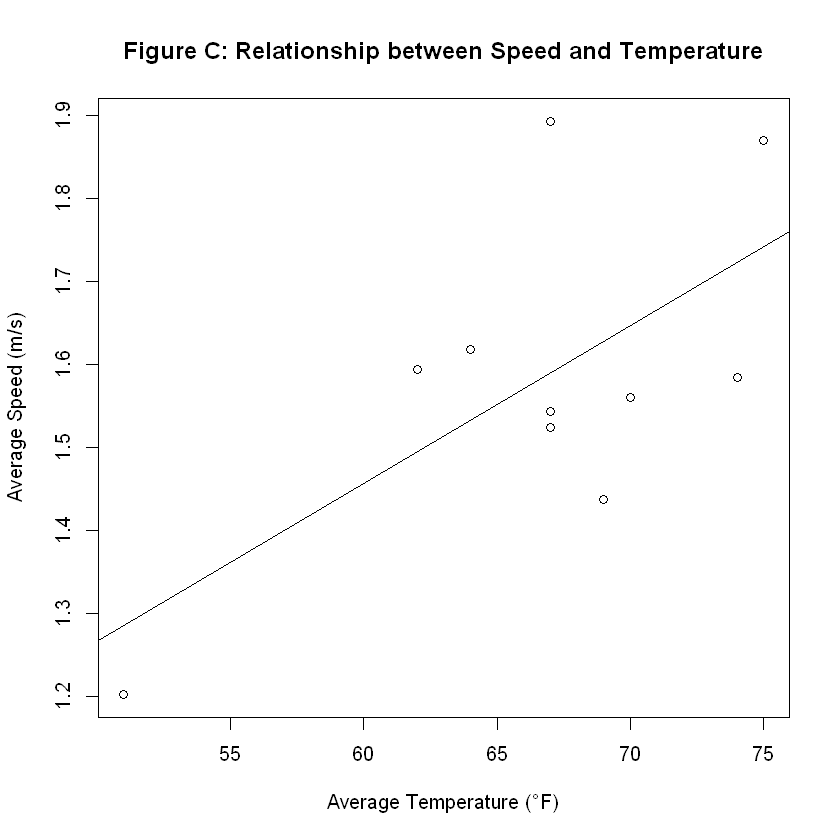

In [8]:
#Take the 1 point from each day

df.full <- rbind(df.1.duration[1,],
                 df.2.duration[1,],
                 df.3.duration[1,],
                 df.4.duration[1,],
                 df.5.duration[1,],
                 df.6.duration[1,],
                 df.7.duration[1,],
                 df.8.duration[1,],
                 df.9.duration[1,],
                 df.11.duration[1,]) #Excluding 10, because it is the same day as 9

#Plot the average speed for each day against the average temperature; fit a linear model to the data
plot(df.full$temp, df.full$speed.avg,
     xlab = "Average Temperature (°F)", ylab = "Average Speed (m/s)", main = "Figure C: Relationship between Speed and Temperature")
temp.lm <- lm(speed.avg ~ temp, data = df.full)
abline(temp.lm)
summary(temp.lm)
cor(df.full$speed.avg, df.full$temp)

## UNCERTAINTY IN TIME AND SPACE

### UNCERTAINTY IN TIME


Call:
lm(formula = duration.sd ~ distance, data = df.full.out)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.988 -17.034  -4.384  16.615  65.165 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.7958     0.9529   23.92   <2e-16 ***
distance     90.8619     0.8369  108.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.93 on 2608 degrees of freedom
Multiple R-squared:  0.8188,	Adjusted R-squared:  0.8188 
F-statistic: 1.179e+04 on 1 and 2608 DF,  p-value: < 2.2e-16


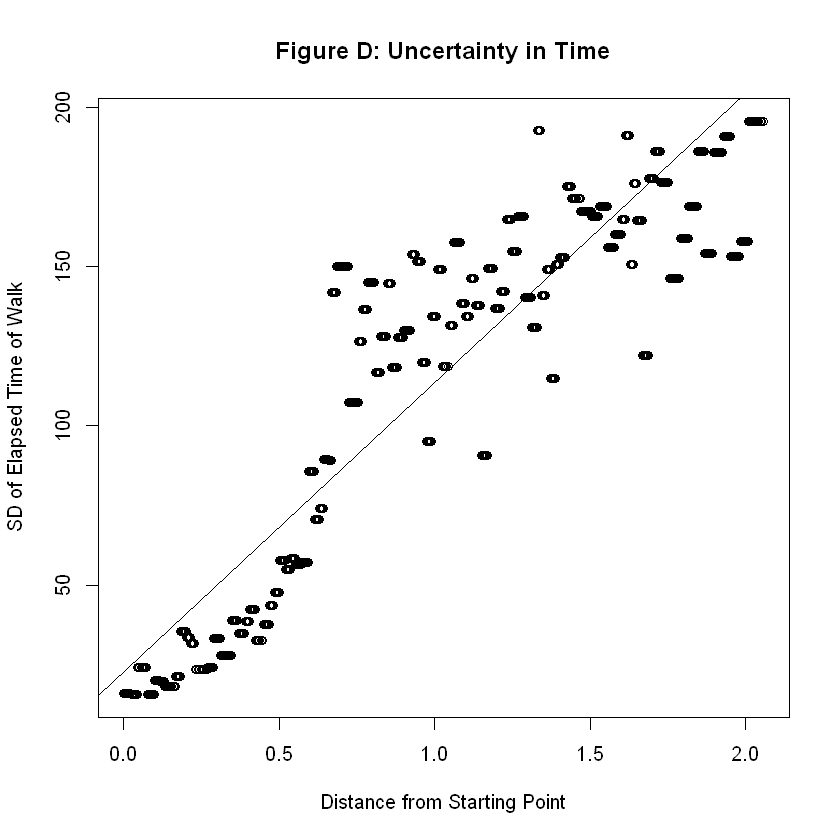

In [11]:
#Create groups of distance travelled

percs <- seq(0,1,.01)
breaks <- quantile(df.full.out$distance, percs)
df.full.out$duration.sd <- NA

#For each group, store the SD of the durations

for(i in 1:(length(breaks)-1)){
    if (i == 1){
        df.full.out[df.full.out$distance >= breaks[i] &
                    df.full.out$distance <= breaks[i+1] ,"duration.sd"] <-
        sd(df.full.out[df.full.out$distance >= breaks[i] &
                       df.full.out$distance <= breaks[i+1] ,"duration"])
    }else{
        df.full.out[df.full.out$distance > breaks[i] &
                    df.full.out$distance <= breaks[i+1] ,"duration.sd"] <-
        sd(df.full.out[df.full.out$distance > breaks[i] &
                       df.full.out$distance <= breaks[i+1] ,"duration"])
        
    }
}

#Plot the SD of the duration in each group against the distance travelled during the walk; fit a linear model to the data

plot(df.full.out$distance, df.full.out$duration.sd,
     xlab = "Distance from Starting Point", ylab = "SD of Elapsed Time of Walk", main = "Figure D: Uncertainty in Time")
lm.unc <- lm(duration.sd ~ distance, data = df.full.out)
abline(lm.unc)
summary(lm.unc)

## UNCERTAINTY IN SPACE


Call:
lm(formula = distance.sd ~ duration, data = df.full.out)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101404 -0.008067  0.000070  0.010798  0.029298 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.844e-02  6.960e-04   26.50   <2e-16 ***
duration    4.165e-05  4.339e-07   95.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01814 on 2608 degrees of freedom
Multiple R-squared:  0.7794,	Adjusted R-squared:  0.7793 
F-statistic:  9214 on 1 and 2608 DF,  p-value: < 2.2e-16


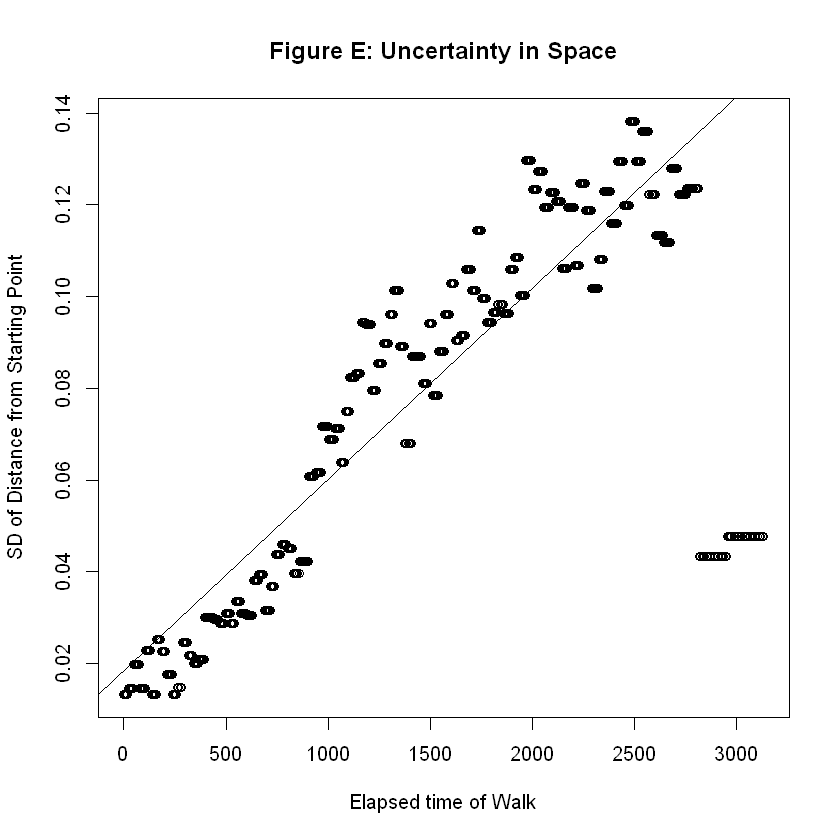

In [12]:
#Create groups of duration of walk

percs <- seq(0,1,.01)
breaks <- quantile(df.full.out$duration, percs)
df.full.out$distance.sd <- NA

#For each group, store the SD of the distance travelled

for(i in 1:(length(breaks)-1)){
    if (i == 1){
        df.full.out[df.full.out$duration >= breaks[i] &
                    df.full.out$duration <= breaks[i+1] ,"distance.sd"] <-
        sd(df.full.out[df.full.out$duration >= breaks[i] &
                       df.full.out$duration <= breaks[i+1] ,"distance"])
    }else{
        df.full.out[df.full.out$duration > breaks[i] &
                    df.full.out$duration <= breaks[i+1] ,"distance.sd"] <-
        sd(df.full.out[df.full.out$duration > breaks[i] &
                       df.full.out$duration <= breaks[i+1] ,"distance"])
        
    }
}

#Plot the SD of the distance travelled in each group against the duration of the walk; fit a linear model to the data

plot(df.full.out$duration, df.full.out$distance.sd,
     xlab = "Elapsed time of Walk", ylab = "SD of Distance from Starting Point", main = "Figure E: Uncertainty in Space")
lm.unc <- lm(distance.sd ~ duration, data = df.full.out)
abline(lm.unc)
summary(lm.unc)


Call:
lm(formula = duration.sd ~ distance.sd, data = df.full.out)

Residuals:
   Min     1Q Median     3Q    Max 
-68.03 -15.84  -4.31  12.77 120.05 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   14.310      1.096   13.05   <2e-16 ***
distance.sd 1298.762     12.874  100.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.4 on 2608 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7959 
F-statistic: 1.018e+04 on 1 and 2608 DF,  p-value: < 2.2e-16


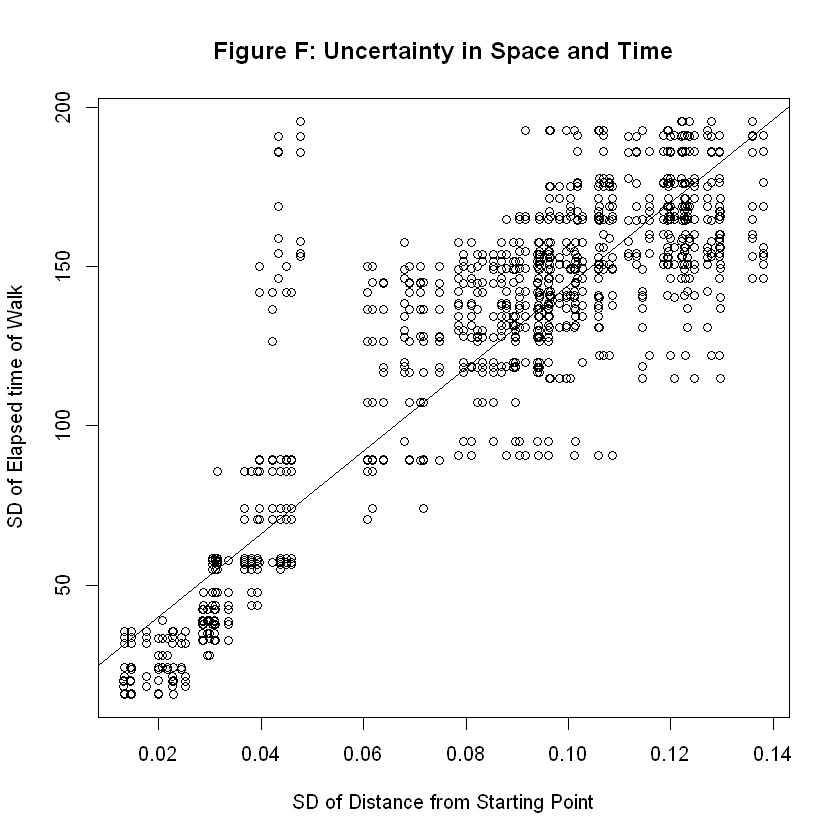

In [13]:
#Plot the SDs of the groups from the above two graphs against each other; fit a linear model to the data

plot(df.full.out$distance.sd, df.full.out$duration.sd,
     xlab = "SD of Distance from Starting Point", ylab = "SD of Elapsed time of Walk", main = "Figure F: Uncertainty in Space and Time")
lm.unc <- lm(duration.sd ~ distance.sd, data = df.full.out)
abline(lm.unc)
summary(lm.unc)

## MODEL VALIDATION

### OUT-OF-SAMPLE TESTING

#### Testing first week data on the second week

In [210]:
df.a <- rbind(df.c.1.out,
              df.c.2.out[df.c.2.out$duration < 479,], 
              df.c.3.out[df.c.3.out$duration < 486,], 
              df.c.4.out[df.c.4.out$duration < 507,]) 

coords.a <- rbind(coords.c.1.out,
                  coords.c.2.out[df.c.2.out$duration < 479,],
                  coords.c.3.out[df.c.3.out$duration < 486,],
                  coords.c.4.out[df.c.4.out$duration < 507,])

latmin <- 5196465
latmax <- 5196600
longmin <- 271650
longmax <- 271950


df.m.a <- df.a[coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax & 
                           coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax, ]

coords.m.a <- data.frame(longitude = coords.a[,"longitude"][coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax &
                                                                      coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax],
                         latitude = coords.a[,"latitude"][coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax &
                                                                      coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax])

mod.long.a <-lm(coords.m.a[,"longitude"] ~ duration + start.long + start.lat, data = df.m.a)


mod.lat.a <-lm(coords.m.a[,"latitude"] ~ duration + start.lat + start.long, data = df.m.a)


resid.df.a <- data.frame(long.resid = mod.long.a$residuals, lat.resid = mod.lat.a$residuals)
resid.df.a$sos <- (resid.df.a$long.resid^2) + (resid.df.a$lat.resid^2)
resid.df.a$duration <- df.m.a$duration

d.a <- mean(resid.df.a[order(resid.df.a$sos), "duration"][1:as.integer(.2*nrow(resid.df.a))])



In [211]:
df.b <- rbind(df.c.2.out,
              df.c.3.out,
              df.c.4.out,
              df.c.5.out)

coords.b <- rbind(coords.c.2.out,
                  coords.c.3.out,
                  coords.c.4.out,
                  coords.c.5.out)

latmin <- 5196450
latmax <- 5196680
longmin <- 271595
longmax <- 271650

df.m.b <- df.b[coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax & 
                           coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax, ]

coords.m.b <- data.frame(longitude = coords.b[,"longitude"][coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax &
                                                                      coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax],
                         latitude = coords.b[,"latitude"][coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax &
                                                                      coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax])

mod.long.b <-lm(coords.m.b[,"longitude"] ~ duration + start.long + start.lat, data = df.m.b)


mod.lat.b <-lm(coords.m.b[,"latitude"] ~ duration + start.lat + start.long, data = df.m.b)


resid.df.b <- data.frame(long.resid = mod.long.b$residuals, lat.resid = mod.lat.b$residuals)
resid.df.b$sos <- (resid.df.b$long.resid^2) + (resid.df.b$lat.resid^2)
resid.df.b$duration <- df.m.b$duration

d.b <- mean(resid.df.b[order(resid.df.b$sos), "duration"][1:as.integer(.3*nrow(resid.df.b))])

In [212]:
n <- 5

d.new.6 <- read_json("gps/20200825121346.geojson") 
d.new.7 <- read_json("gps/20200826131614.geojson") 
d.new.8 <- read_json("gps/20200827113234.geojson") 
d.new.9 <- read_json("gps/20200828122627.geojson") 
d.new.11 <- read_json("gps/20200831115147.geojson") 

df.new <- data.frame(longitude = rep(NA, n), latitude= rep(NA, n), time= rep(NA, n))

df.new$longitude <- c(d.new.6[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.7[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.8[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.9[["features"]][[1]][["geometry"]][["coordinates"]][[1]],
                      d.new.11[["features"]][[1]][["geometry"]][["coordinates"]][[1]])

df.new$latitude <- c(d.new.6[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.7[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.8[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.9[["features"]][[1]][["geometry"]][["coordinates"]][[2]],
                     d.new.11[["features"]][[1]][["geometry"]][["coordinates"]][[2]])

df.new$time <- c(d.new.6[["features"]][[1]][["properties"]][["time"]],
                 d.new.7[["features"]][[1]][["properties"]][["time"]],
                 d.new.8[["features"]][[1]][["properties"]][["time"]],
                 d.new.9[["features"]][[1]][["properties"]][["time"]],
                 d.new.11[["features"]][[1]][["properties"]][["time"]])
                     

In [213]:
bomb.final <- place.bombs(bombs(df.new$longitude, df.new$latitude, df.new$time))
bomb.final

,longitude,latitude,time,weekday,hits,accuracy,bomb.id
4,-113.9968,46.88335,2020-08-28 16:35:09,Friday,1,0.9883019,A
3,-113.9975,46.88368,2020-08-31 15:59:23,Monday,2,1.2312532,B


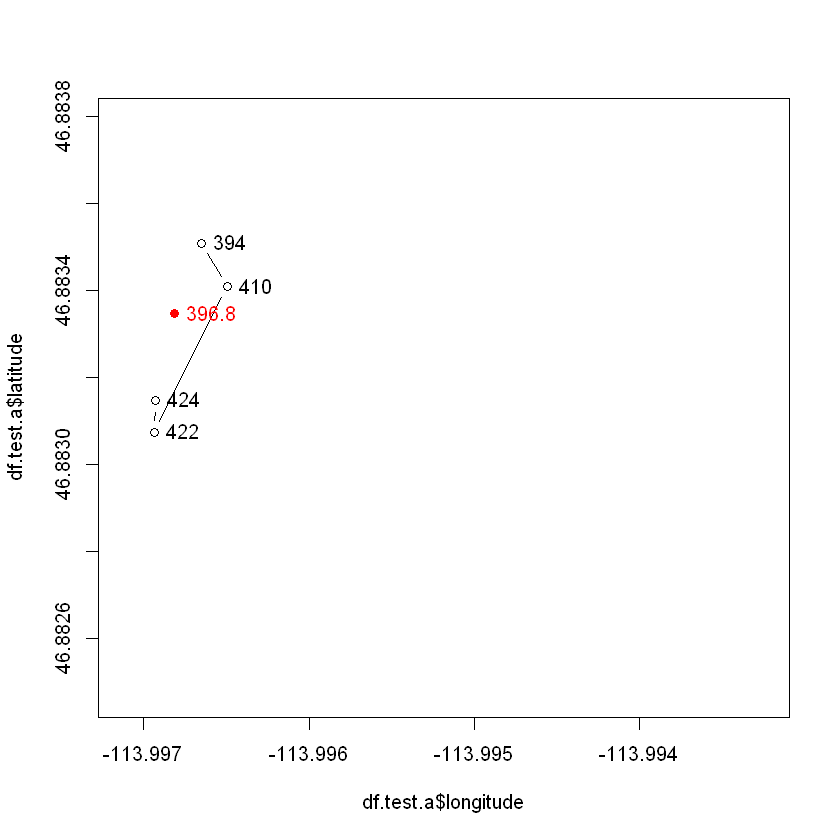

In [214]:
coords.bomb <- df.c.9.out
b <- 1
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], bomb.final[b, c("longitude", "latitude")])

df.test.a <- coords.bomb[dist.vec <= .02,]


plot(df.test.a$longitude, df.test.a$latitude,
     xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379), type = "b")
text(df.test.a$longitude, df.test.a$latitude, labels = df.test.a$duration, pos = 4)


points(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", pch = 19)
text(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", labels = d.a, pos = 4)

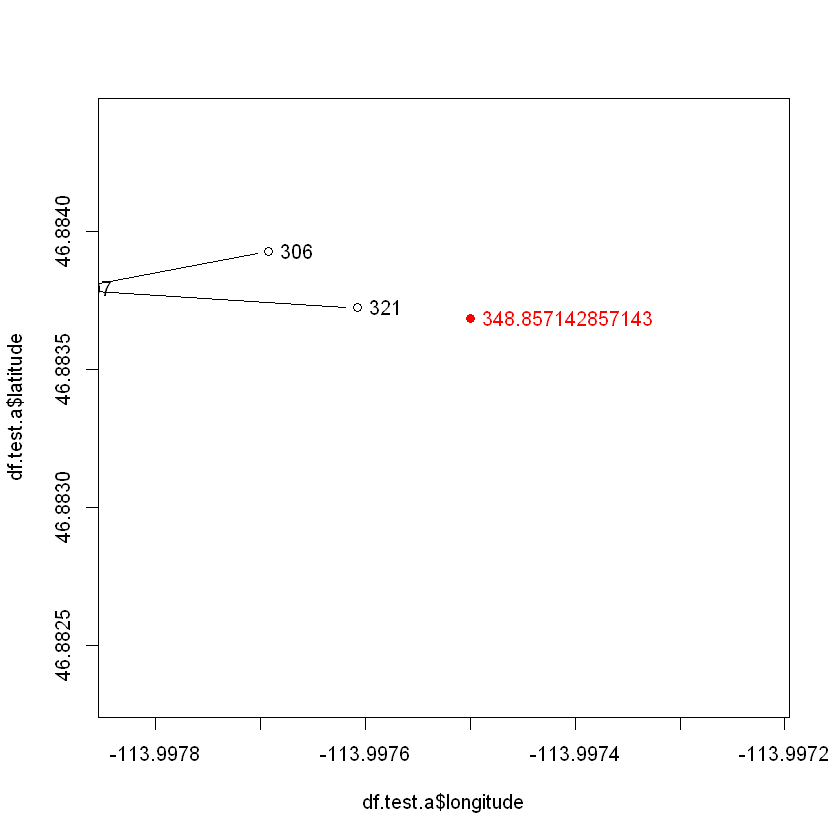

In [215]:
coords.bomb <- df.c.11.out
b <- 2
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], bomb.final[b, c("longitude", "latitude")])

df.test.a <- coords.bomb[dist.vec <= .02,]


plot(df.test.a$longitude, df.test.a$latitude,
     xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440), type = "b")
text(df.test.a$longitude, df.test.a$latitude, labels = df.test.a$duration, pos = 4)


points(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", pch = 19)
text(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", labels = d.b, pos = 4)

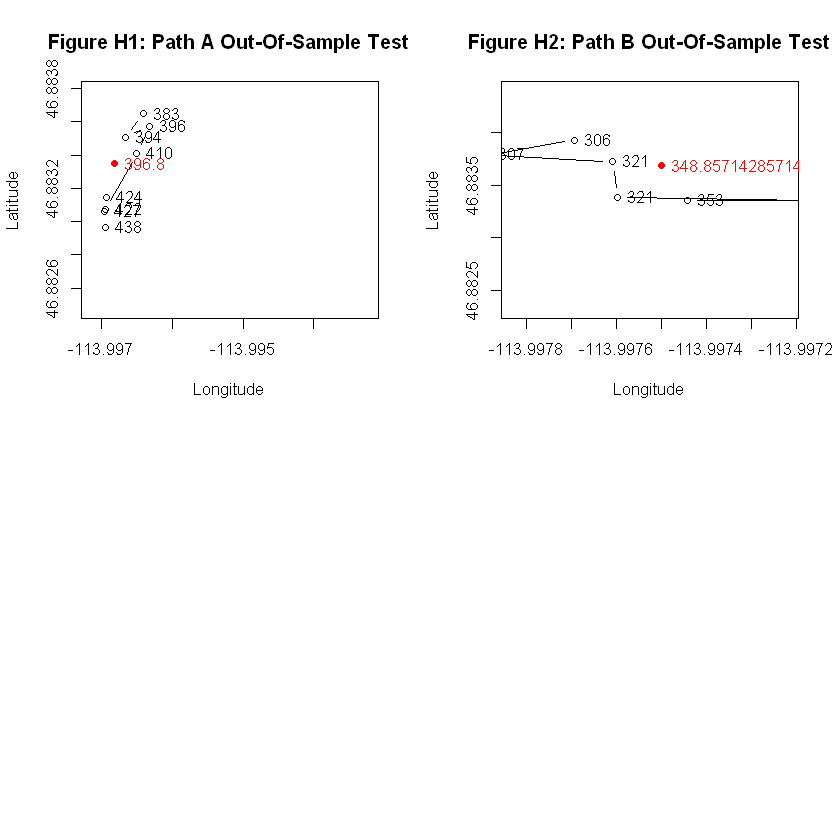

In [216]:
par(mfrow = c(2,2))
coords.bomb <- df.c.9.out
b <- 1
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], bomb.final[b, c("longitude", "latitude")])

df.test.a <- coords.bomb[dist.vec <= .03,]


plot(df.test.a$longitude, df.test.a$latitude,
     xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379), type = "b",
     xlab = "Longitude", ylab = "Latitude", main = "Figure H1: Path A Out-Of-Sample Test")
text(df.test.a$longitude, df.test.a$latitude, labels = df.test.a$duration, pos = 4)


points(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", pch = 19)
text(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", labels = d.a, pos = 4)

coords.bomb <- df.c.11.out
b <- 2
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], bomb.final[b, c("longitude", "latitude")])

df.test.a <- coords.bomb[dist.vec <= .03,]


plot(df.test.a$longitude, df.test.a$latitude,
     xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440), type = "b",
     xlab = "Longitude", ylab = "Latitude", main = "Figure H2: Path B Out-Of-Sample Test")

text(df.test.a$longitude, df.test.a$latitude, labels = df.test.a$duration, pos = 4)


points(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", pch = 19)
text(bomb.final[b, "longitude"], bomb.final[b, "latitude"], col = "red", labels = d.b, pos = 4)


#### Testing individual days

To do this testing, I removed the specifc dataset that I wanted to test from the regressions. Running the regression blocks determines a time to place the bomb. I use the bombs() function on the initial condition of the removed dataset to determine the position of the bomb. I then placed this point on a graph with points within a specified radius of the bomb. If the bomb was within 5 meters of the user, I considered that a hit. In some instances, if the user was walking in the direction of the bomb, within the time limit, and fairly close to the bomb (i.e. within 10 meters), I considered that a hit, as the user would have likely been in the radius of the explosion at the denoted time. An examle with dataset 8 is below.

In [171]:
#Load in data, remove outlier data

df.a <- rbind(df.c.1.out, # Miss 2
              df.c.2.out[df.c.2.out$duration < 479,], # Hit 1, Miss 1
              df.c.3.out[df.c.3.out$duration < 486,], # Miss 2
              df.c.4.out[df.c.4.out$duration < 507,], # Miss 2
              df.c.7.out, # Miss 2
              df.c.9.out[df.c.9.out$duration < 422,], # Miss 2
              df.c.11.out[df.c.11.out$duration < 449,]) # Miss 1, Hit 1

coords.a <- rbind(coords.c.1.out,
                  coords.c.2.out[df.c.2.out$duration < 479,],
                  coords.c.3.out[df.c.3.out$duration < 486,],
                  coords.c.4.out[df.c.4.out$duration < 507,],
                  coords.c.7.out,
                  coords.c.9.out[df.c.9.out$duration < 422,],
                  coords.c.11.out[df.c.11.out$duration < 449,])

latmin <- 5196465
latmax <- 5196600
longmin <- 271650
longmax <- 271950

#Create a subset of the data that only includes data within specific longitude and latitude ranges

df.m.a <- df.a[coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax & 
                           coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax, ]

coords.m.a <- data.frame(longitude = coords.a[,"longitude"][coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax &
                                                                      coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax],
                         latitude = coords.a[,"latitude"][coords.a[,"longitude"] > longmin & coords.a[,"longitude"] < longmax &
                                                                      coords.a[,"latitude"] > latmin & coords.a[,"latitude"] < latmax])

#Generate longitude and latitude regressions

mod.long.a <-lm(coords.m.a[,"longitude"] ~ duration + start.long + start.lat, data = df.m.a)


mod.lat.a <-lm(coords.m.a[,"latitude"] ~ duration + start.lat + start.long, data = df.m.a)

#Create a data frame of residuals; take the sum of squared residuals for each longitude-latitude pair; take the average
#duration of the top 20% of pairs with the smallest sum of squared residuals

resid.df.a <- data.frame(long.resid = mod.long.a$residuals, lat.resid = mod.lat.a$residuals)
resid.df.a$sos <- (resid.df.a$long.resid^2) + (resid.df.a$lat.resid^2)
resid.df.a$duration <- df.m.a$duration

d.a <- mean(resid.df.a[order(resid.df.a$sos), "duration"][1:as.integer(.2*nrow(resid.df.a))])

In [172]:
#Load in data, remove outlier data

df.b <- rbind(df.c.5.out, # Hit 1, Miss 1
              df.c.6.out, # Hit 1, Miss 1
              df.c.3.out, # Miss 2
              df.c.4.out, # Miss 2
              df.c.2.out) # Hit 1, 1 Miss

coords.b <- rbind(coords.c.5.out,
                  coords.c.6.out,
                  coords.c.3.out,
                  coords.c.4.out,
                  coords.c.2.out)

latmin <- 5196450
latmax <- 5196680
longmin <- 271595
longmax <- 271650

#Create a subset of the data that only includes data within specific longitude and latitude ranges

df.m.b <- df.b[coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax & 
                           coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax, ]

coords.m.b <- data.frame(longitude = coords.b[,"longitude"][coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax &
                                                                      coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax],
                         latitude = coords.b[,"latitude"][coords.b[,"longitude"] > longmin & coords.b[,"longitude"] < longmax &
                                                                      coords.b[,"latitude"] > latmin & coords.b[,"latitude"] < latmax])

#Generate longitude and latitude regressions

mod.long.b <-lm(coords.m.b[,"longitude"] ~ duration + start.long + start.lat, data = df.m.b)


mod.lat.b <-lm(coords.m.b[,"latitude"] ~ duration + start.lat + start.long, data = df.m.b)

#Create a data frame of residuals; take the sum of squared residuals for each longitude-latitude pair; take the average
#duration of the top 20% of pairs with the smallest sum of squared residuals

resid.df.b <- data.frame(long.resid = mod.long.b$residuals, lat.resid = mod.lat.b$residuals)
resid.df.b$sos <- (resid.df.b$long.resid^2) + (resid.df.b$lat.resid^2)
resid.df.b$duration <- df.m.b$duration

d.b <- mean(resid.df.b[order(resid.df.b$sos), "duration"][1:as.integer(.3*nrow(resid.df.b))])

In [183]:
bdf <- df.8.duration
bomb <- bombs(bdf$longitude[1], bdf$latitude[1], bdf$time[1])
bomb

[[1]]
[1] "Bomb.A"

[[2]]
[1] "Bomb.B"

$Bomb.A
$Bomb.A$longitude
[1] -113.9962

$Bomb.A$latitude
[1] 46.88316

$Bomb.A$time
[1] "2020-08-27 15:41:42 MDT"

$Bomb.A$weekday
[1] "Thursday"

$Bomb.A$duration
[1] 424.4545


$Bomb.B
$Bomb.B$longitude
[1] -113.9975

$Bomb.B$latitude
[1] 46.88328

$Bomb.B$time
[1] "2020-08-27 15:40:37 MDT"

$Bomb.B$weekday
[1] "Thursday"

$Bomb.B$duration
[1] 359.1538



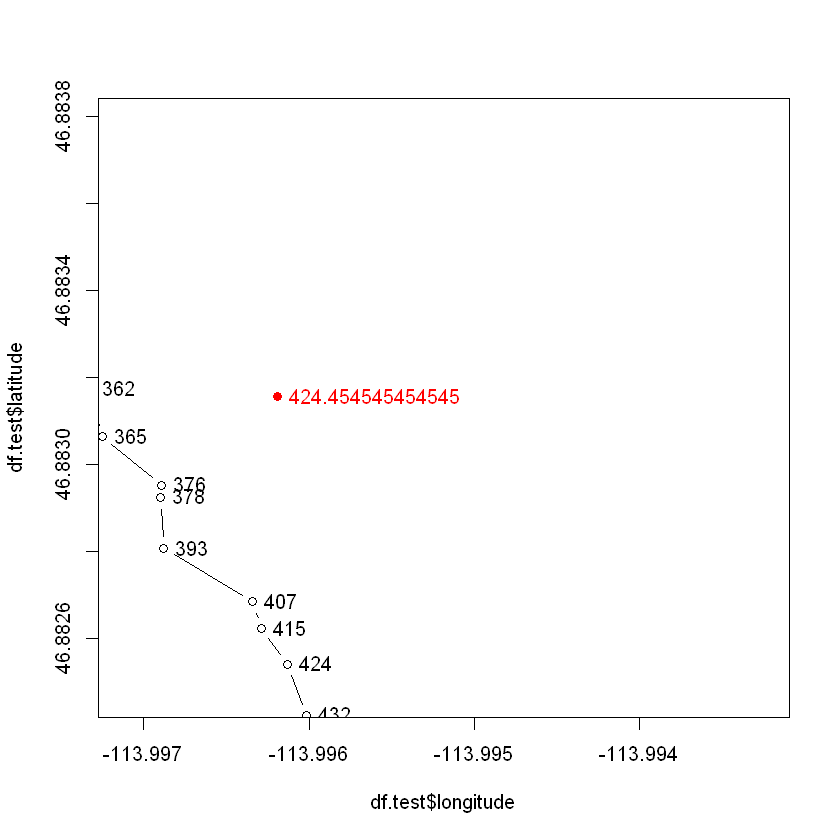

In [174]:
df.bomb <- data.frame(longitude = bomb$Bomb.A$longitude, latitude = bomb$Bomb.A$latitude)

coords.bomb <- df.c.8.out
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], df.bomb[1, c("longitude", "latitude")])

df.test <- coords.bomb[dist.vec <= .1,]

# df.test
plot(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379), type = "b")
text(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379),
     labels = df.test$duration, pos = 4)

points(bomb$Bomb.A$longitude,
       bomb$Bomb.A$latitude,
       col = "red", pch = 19)
text(bomb$Bomb.A$longitude,
     bomb$Bomb.A$latitude,
     col = "red", pch = 19,
     labels = bomb$Bomb.A$duration, pos = 4)


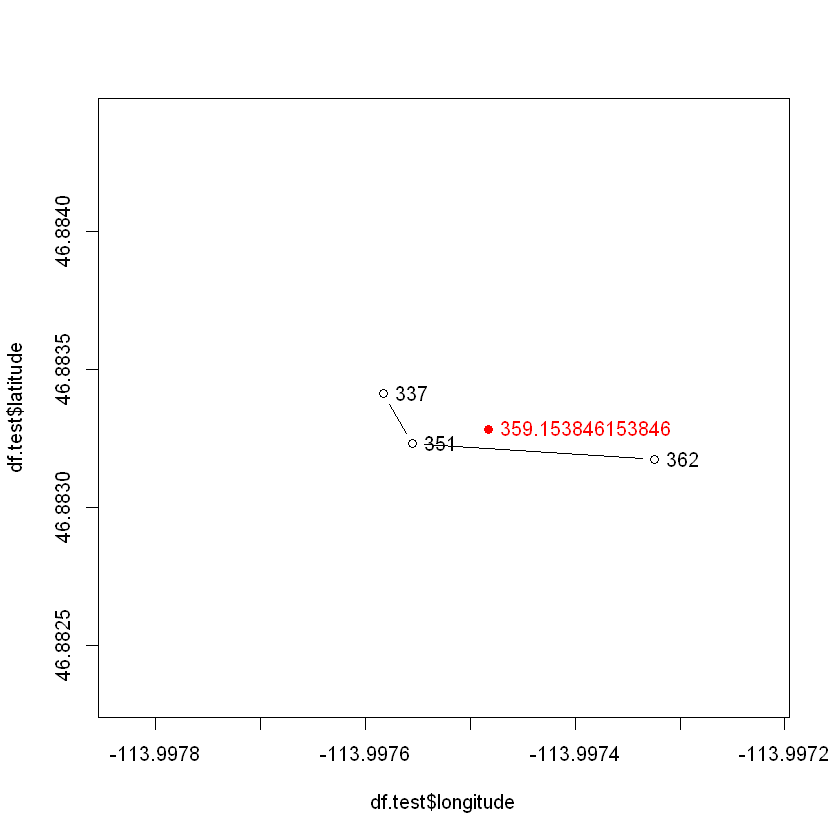

In [180]:
df.bomb <- data.frame(longitude = bomb$Bomb.B$longitude, latitude = bomb$Bomb.B$latitude)

coords.bomb <- df.c.8.out
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], df.bomb[1, c("longitude", "latitude")])

df.test <- coords.bomb[dist.vec <= .012,]

plot(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440), type = "b")
text(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440),
     labels = df.test$duration, pos = 4)

points(bomb$Bomb.B$longitude,
       bomb$Bomb.B$latitude,
       col = "red", pch = 19)
text(bomb$Bomb.B$longitude,
     bomb$Bomb.B$latitude,
     col = "red", pch = 19,
     labels = bomb$Bomb.B$duration, pos = 4)

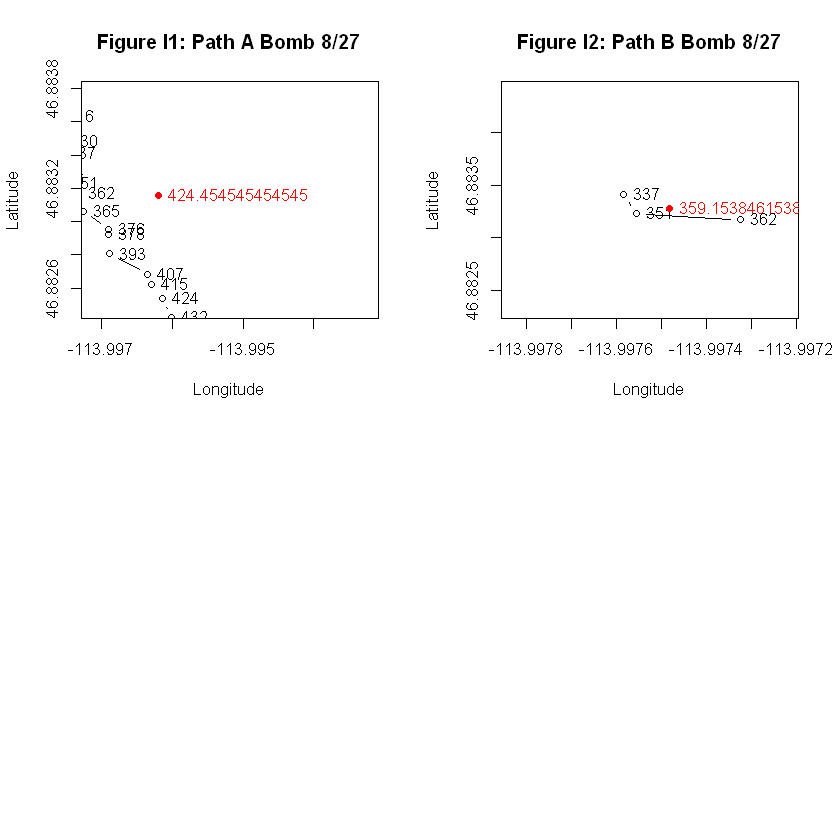

In [185]:
par(mfrow = c(2,2))
df.bomb <- data.frame(longitude = bomb$Bomb.A$longitude, latitude = bomb$Bomb.A$latitude)

coords.bomb <- df.c.8.out
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], df.bomb[1, c("longitude", "latitude")])

df.test <- coords.bomb[dist.vec <= .1,]

# df.test
plot(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379), type = "b",
     xlab = "Longitude", ylab = "Latitude", main = "Figure I1: Path A Bomb 8/27")
text(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379),
     labels = df.test$duration, pos = 4)

points(bomb$Bomb.A$longitude,
       bomb$Bomb.A$latitude,
       col = "red", pch = 19)
text(bomb$Bomb.A$longitude,
     bomb$Bomb.A$latitude,
     col = "red", pch = 19,
     labels = bomb$Bomb.A$duration, pos = 4)




df.bomb <- data.frame(longitude = bomb$Bomb.B$longitude, latitude = bomb$Bomb.B$latitude)

coords.bomb <- df.c.8.out
dist.vec <- rdist.earth(coords.bomb[, c("longitude", "latitude")], df.bomb[1, c("longitude", "latitude")])

df.test <- coords.bomb[dist.vec <= .012,]

plot(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440), type = "b",
     xlab = "Longitude", ylab = "Latitude", main = "Figure I2: Path B Bomb 8/27")

text(df.test$longitude,
     df.test$latitude,
     xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440),
     labels = df.test$duration, pos = 4)

points(bomb$Bomb.B$longitude,
       bomb$Bomb.B$latitude,
       col = "red", pch = 19)
text(bomb$Bomb.B$longitude,
     bomb$Bomb.B$latitude,
     col = "red", pch = 19,
     labels = bomb$Bomb.B$duration, pos = 4)

## OTHER DATA VISUALIZATIONS

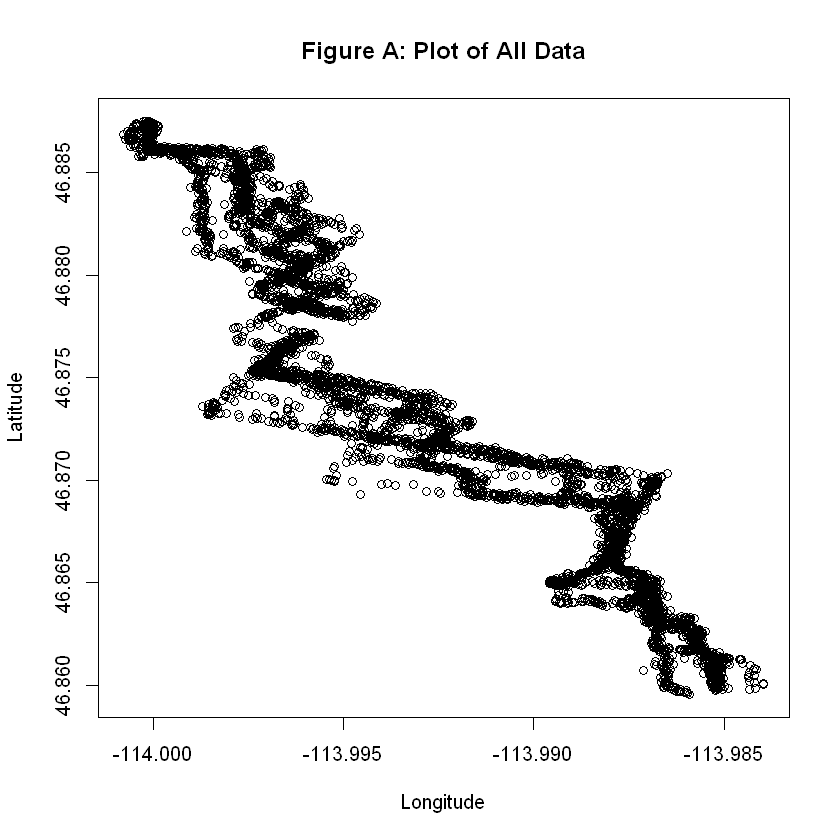

In [187]:
df.full.duration <- rbind(df.1.duration,
                          df.2.duration,
                          df.3.duration,
                          df.4.duration,
                          df.5.duration,
                          df.6.duration,
                          df.7.duration[1:703,],
                          df.8.duration,
                          df.9.duration,
                          df.10.duration,
                          df.11.duration)
plot(df.full.duration$longitude, df.full.duration$latitude,
     xlab = "Longitude", ylab = "Latitude", main = "Figure A: Plot of All Data")

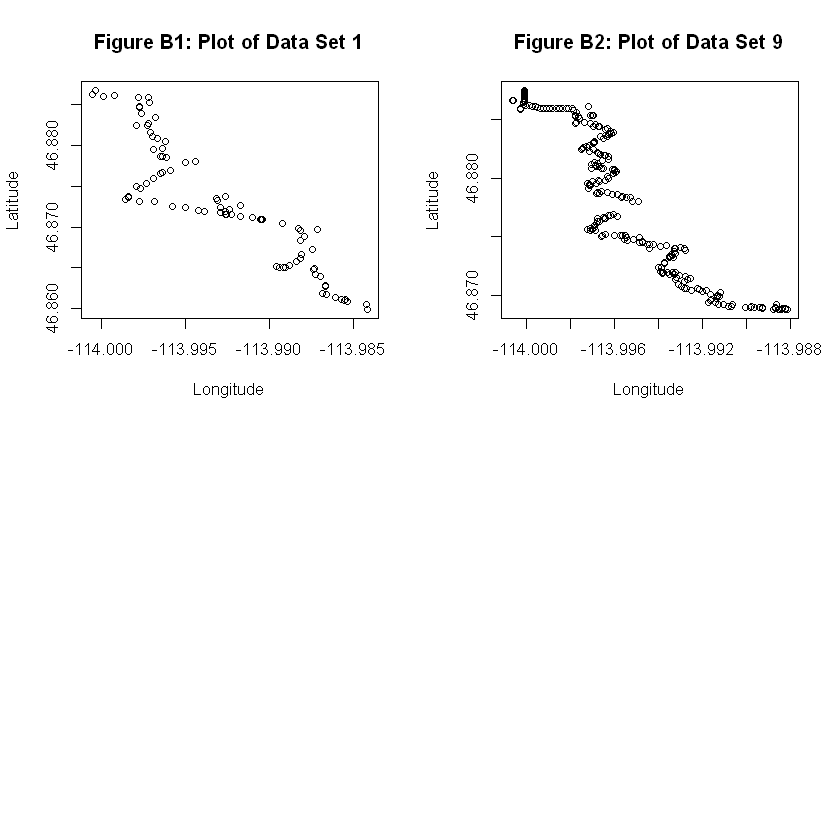

In [189]:
par(mfrow=c(2,2))

plot(df.1.duration$longitude, df.1.duration$latitude,
     xlab = "Longitude", ylab = "Latitude", main = "Figure B1: Plot of Data Set 1")

plot(df.9.duration$longitude, df.9.duration$latitude,
     xlab = "Longitude", ylab = "Latitude", main = "Figure B2: Plot of Data Set 9")

In [190]:
# Analyzing outbound times
df.first.out <- rbind(df.1.out[1,],
                      df.2.out[1,],
                      df.3.out[1,],
                      df.4.out[1,],
                      df.5.out[1,],
                      df.6.out[1,],
                      df.7.out[1,],
                      df.8.out[1,],
                      df.9.out[1,],
                      df.11.out[1,])

table(df.first.out$hour)
mean(df.first.out$hour)


df.last.out <- rbind(df.1.out[nrow(df.1.out),],
                     df.2.out[nrow(df.2.out),],
                     df.3.out[nrow(df.3.out),],
                     df.4.out[nrow(df.4.out),],
                     df.5.out[nrow(df.5.out),],
                     df.6.out[nrow(df.6.out),],
                     df.7.out[nrow(df.7.out),],
                     df.8.out[nrow(df.8.out),],
                     df.11.out[nrow(df.11.out),])


print("minutes")
mean(df.last.out$duration)/60
sd(df.last.out$duration)/60
min(df.last.out$duration)/60
max(df.last.out$duration)/60
print("seconds")
60*.9740740740741
60*.76445834446309
60*.9166666666667
60*.2833333333333



15 16 17 19 
 4  2  3  1 

[1] 16.2

[1] "minutes"


[1] 46.97407

[1] 2.764458

[1] 42.91667

[1] 52.28333

[1] "seconds"


[1] 58.44444

[1] 45.8675

[1] 55

[1] 17

In [191]:
# Analyzing Inbound times
df.first.in <- rbind(df.1.in[1,],
                     df.2.in[1,],
                     df.3.in[1,],
                     df.4.in[1,],
                     df.5.in[1,],
                     df.6.in[1,],
                     df.7.in[1,],
                     df.8.in[1,],
                     df.10.in[1,],
                     df.11.in[1,])

table(df.first.in$hour)
mean(df.first.in$hour)

df.first.in$hour

df.last.in <- rbind(df.2.in[nrow(df.2.in),],
                    df.4.in[nrow(df.4.in),],
                    df.5.in[nrow(df.5.in),],
                    df.6.in[nrow(df.6.in),],
                    df.7.in[nrow(df.7.in),],
                    df.8.in[nrow(df.8.in),],
                    df.10.in[nrow(df.10.in),],
                    df.11.in[nrow(df.11.in),])


print("minutes")
mean(df.last.in$duration)/60
sd(df.last.in$duration)/60
min(df.last.in$duration)/60
max(df.last.in$duration)/60
print("seconds")
60*.26875
60*.51933145019629
60*0
60*.9833333333333

# df.last.in


-2 19 20 21 
 1  1  4  4 

[1] 18.1

[1] 20 21 -2 21 20 19 21 20 21 20

[1] "minutes"


[1] 44.26875

[1] 1.519331

[1] 42

[1] 45.98333

[1] "seconds"


[1] 16.125

[1] 31.15989

[1] 0

[1] 59

In [192]:
# Comparing the time of arrival at the destination to the time of departure home
df.first.in <- rbind(df.1.in[1,],
                     df.2.in[1,],
                     df.3.in[1,],
                     df.4.in[1,],
                     df.5.in[1,],
                     df.6.in[1,],
                     df.7.in[1,],
                     df.8.in[1,],
                     df.11.in[1,])

outin <- data.frame(outbound = df.last.out$time.reduced, inbound = df.first.in$time.reduced)
outin$t <- outin$inbound - outin$outbound
mean(outin$t)
sd(outin$t)
# plot(outin$outbound, outin$inbound)
# abline
60*.46839506172839
60*.965140925328612

[1] 0.8017284

[1] 8.46425

[1] 28.1037

[1] 57.90846

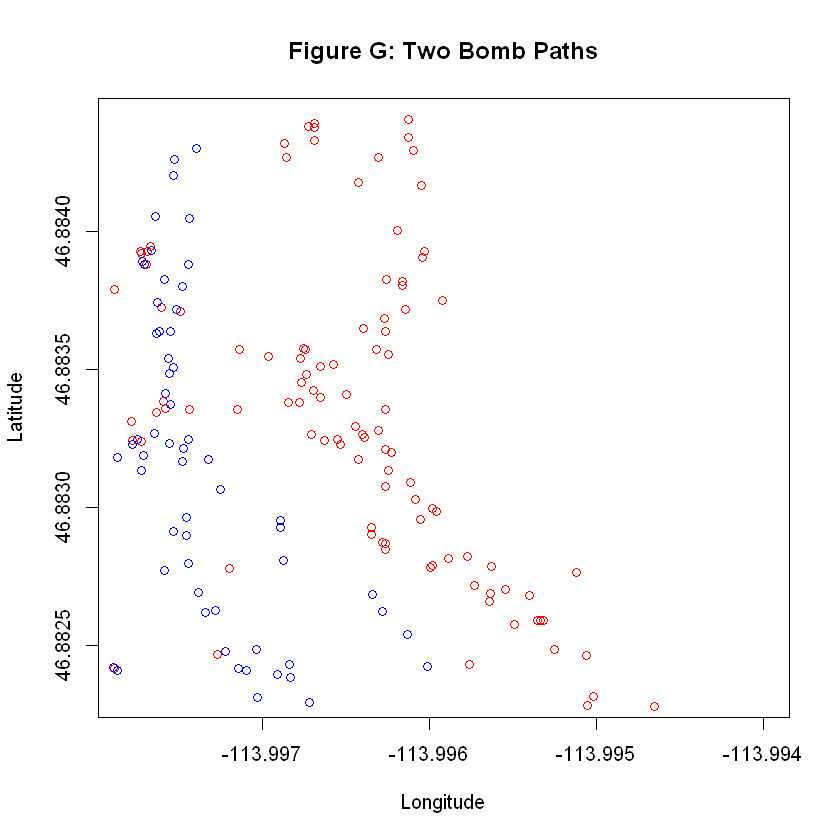

In [193]:
# All data in beginning
df.a <- rbind(df.c.1.out,
              df.c.2.out[df.c.2.out$duration < 479,], 
              df.c.3.out[df.c.3.out$duration < 486,], 
              df.c.4.out[df.c.4.out$duration < 507,], 
              df.c.7.out, 
              df.c.9.out[df.c.9.out$duration < 422,], 
              df.c.11.out[df.c.11.out$duration < 449,])

df.b <- rbind(df.c.5.out, 
              df.c.6.out, 
              df.c.8.out) 

plot(df.a$longitude, df.a$latitude, col = "red",
     xlim = c(-113.99783, -113.994), ylim = c(46.88232, 46.88440),
     xlab = "Longitude", ylab = "Latitude", main = "Figure G: Two Bomb Paths")
points(df.b$longitude, df.b$latitude, col = "blue")
#      xlim = c(-113.99712, -113.99325), ylim = c(46.88247, 46.88379), type = "b")
#      xlim = c(-113.99783, -113.99722), ylim = c(46.88232, 46.88440), type = "b")


[1] 1.047891e-15

[1] 1.861741e-16

[1] 3.356526e-17

[1] 2.368061e-17

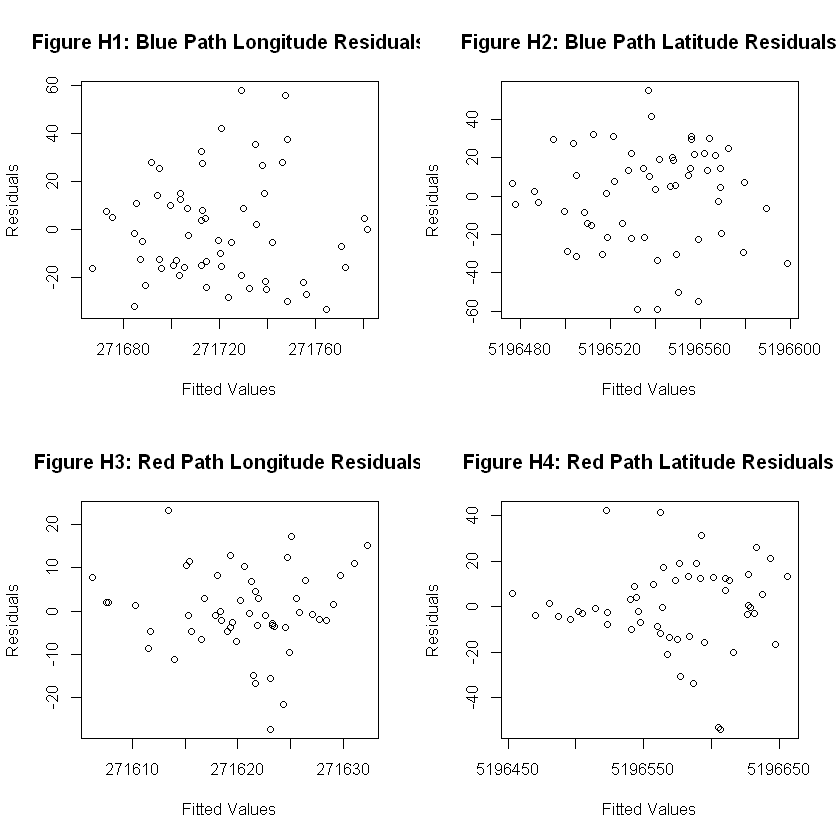

In [201]:
#Residual Plots for each path
par(mfrow = c(2,2))
plot(mod.long.a$fitted.values, mod.long.a$residuals,
     xlab = "Fitted Values", ylab = "Residuals", main = "Figure H1: Blue Path Longitude Residuals")
plot(mod.lat.a$fitted.values, mod.lat.a$residuals,
     xlab = "Fitted Values", ylab = "Residuals", main = "Figure H2: Blue Path Latitude Residuals")
plot(mod.long.b$fitted.values, mod.long.b$residuals,
     xlab = "Fitted Values", ylab = "Residuals", main = "Figure H3: Red Path Longitude Residuals")
plot(mod.lat.b$fitted.values, mod.lat.b$residuals,
     xlab = "Fitted Values", ylab = "Residuals", main = "Figure H4: Red Path Latitude Residuals")

mean(mod.long.a$residuals)
mean(mod.lat.a$residuals)
mean(mod.long.b$residuals)
mean(mod.lat.b$residuals)